In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Importing the dataset
df= pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df.shape

(7043, 21)

The dataset has 7043 rows and 21 columns

In [36]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We see that most of the features are of type object.
Monthly charges are of type float.

In [37]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We can see that customerID is unique for each customer, so we can delete the feature from the dataset.

In [38]:
df=df.drop("customerID",axis=1)
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [39]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see that there are no missing values in the dataset.

In [40]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

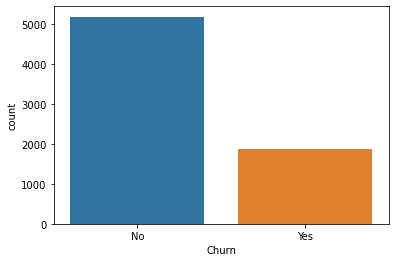

In [41]:
sn.countplot(df['Churn'])

We can see here that our target class is imbalanced.

<AxesSubplot:xlabel='gender', ylabel='count'>

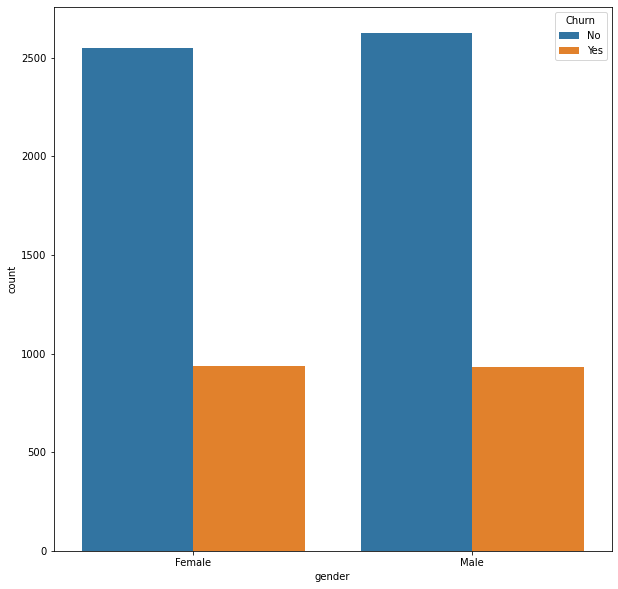

In [42]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='gender', hue='Churn')

We can see that the churn does not depend on gender

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

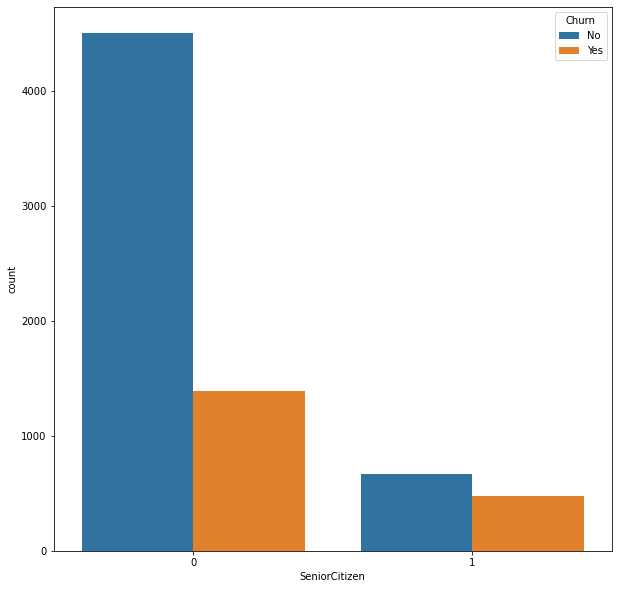

In [43]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='SeniorCitizen', hue='Churn')

Customers are more likely to churn if they are senior citizen

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

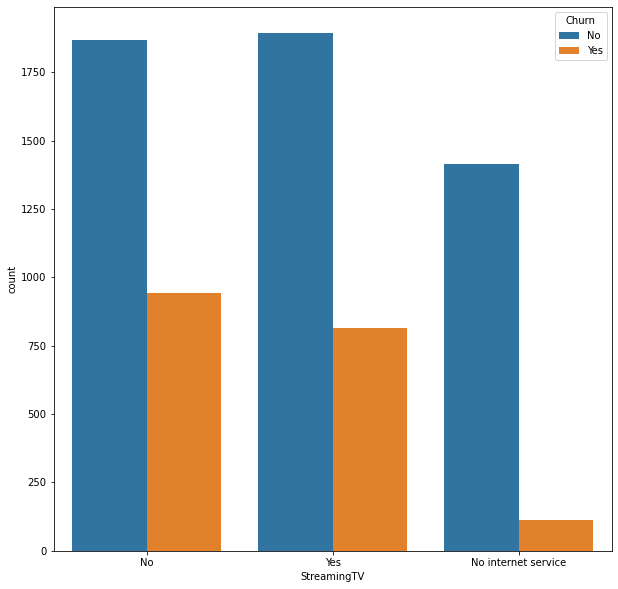

In [44]:
 
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='StreamingTV', hue='Churn')

Customers with no internet service often have the lowest attrition rate.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

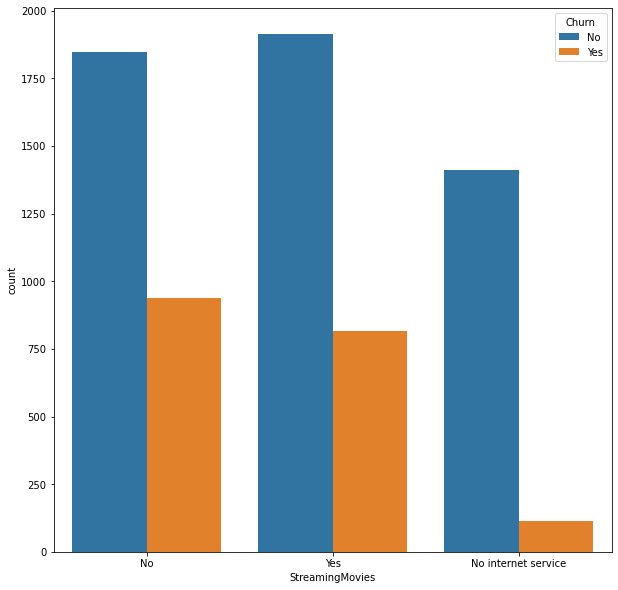

In [45]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='StreamingMovies', hue='Churn')

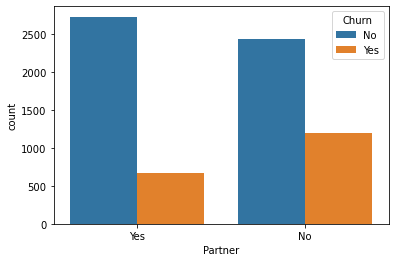

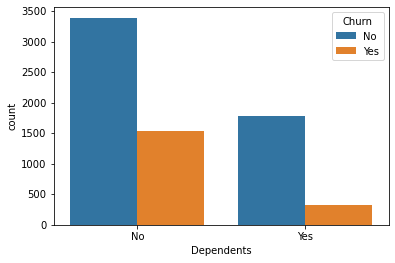

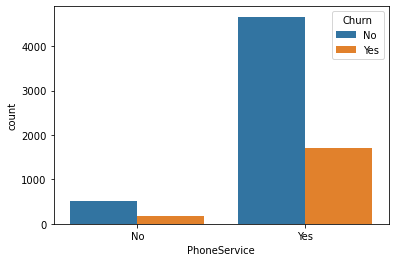

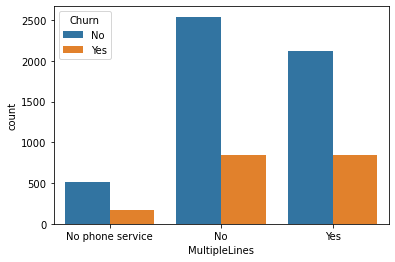

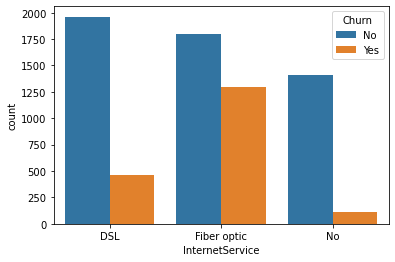

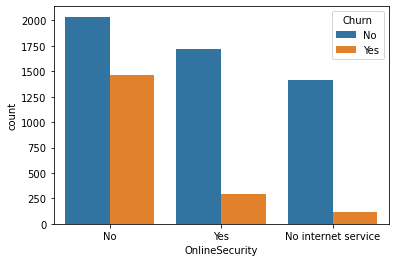

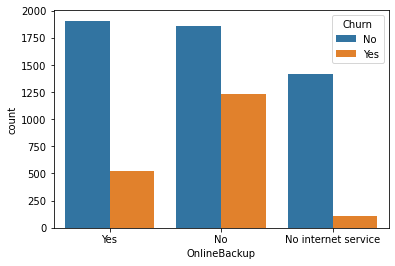

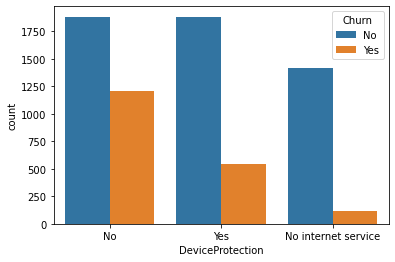

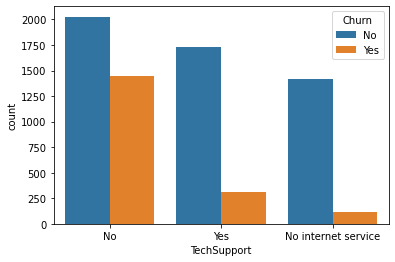

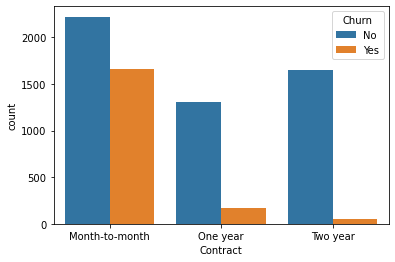

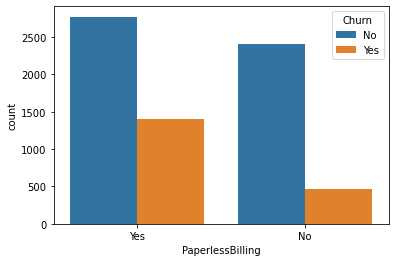

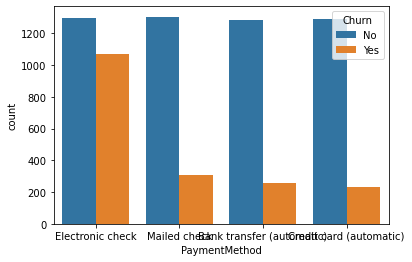

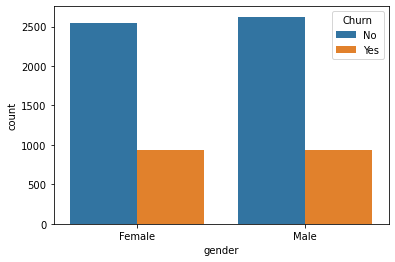

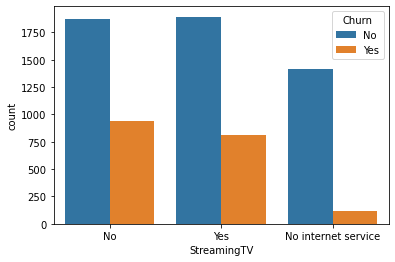

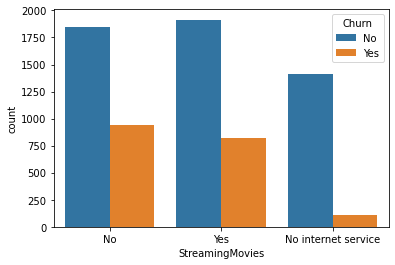

In [46]:
columns = ['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','PaymentMethod','gender','StreamingTV','StreamingMovies']
for i,col in enumerate(columns):
    plt.figure(i)
    sn.countplot(x=col, data=df, hue = 'Churn')

We can see from the above graphs that 
1.Churn rate is higher if the customer has no partner.
2.Churn rate is higher if the customer has no dependents.
3.Churn rate is higher if the customer has phone service.
4.Churn rate is higher if the customer has Fiber optic Internet service instead of DSL.
5.Churn rate is higher if the customer has no online security and backup.
6.Churn rate is higher if the customer has no device protection and tech support.
7.Churn rate is higher if the customer has monthly contract compared to one year or two year contract.
8.Churn rate does not depend on gender.

<b>Feature Encoding<b>

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Churn'] = labelencoder.fit_transform(df['Churn'])

In [48]:
le=LabelEncoder()
for i in columns:
    df[i] = le.fit_transform(df[i])
df
   

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


As the target variable is imabalanced.
Let us balance the target variable by upsampling the minority.

In [49]:
no_churn = df[df.Churn==0]
yes_churn = df[df.Churn==1]

In [50]:
from sklearn.utils import resample
#upsampling minority
churn_upsampled = resample(yes_churn,
                         replace = True,
                         n_samples = len(no_churn),
                         random_state =27)

In [51]:
df_upsampled = pd.concat([no_churn,churn_upsampled])

<AxesSubplot:xlabel='Churn', ylabel='count'>

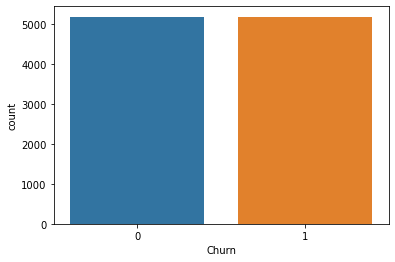

In [52]:
sn.countplot(df_upsampled['Churn'])

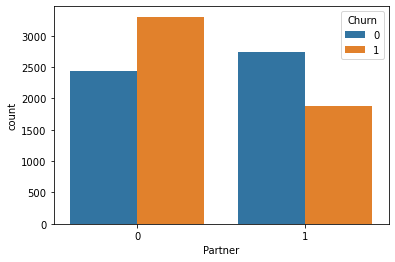

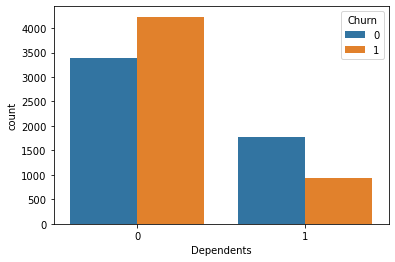

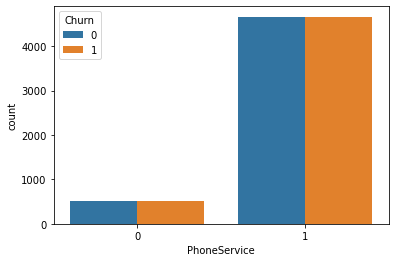

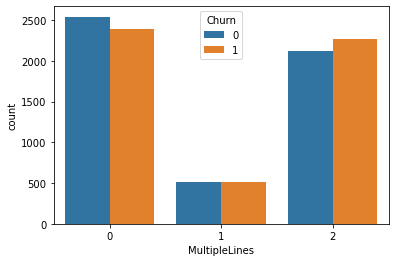

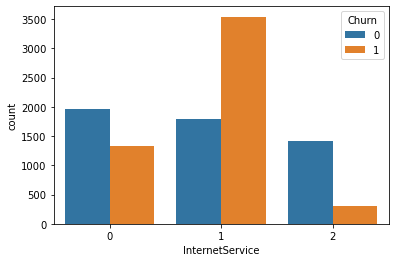

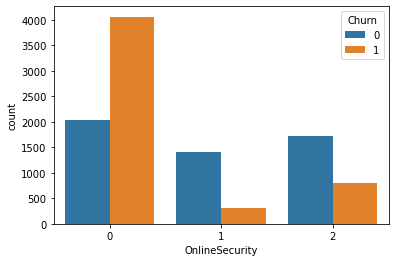

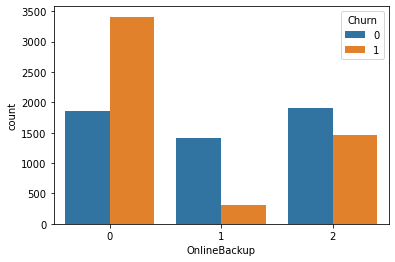

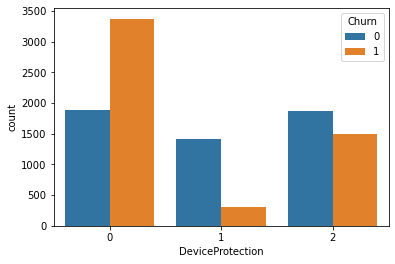

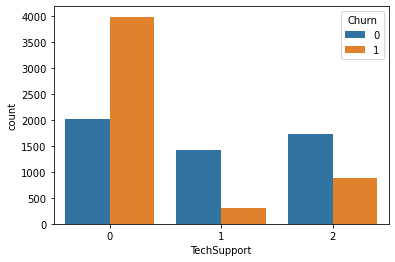

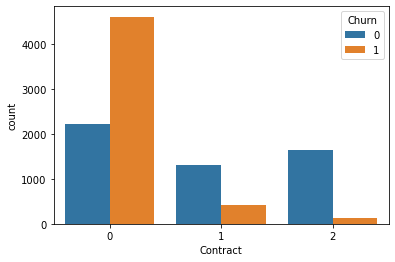

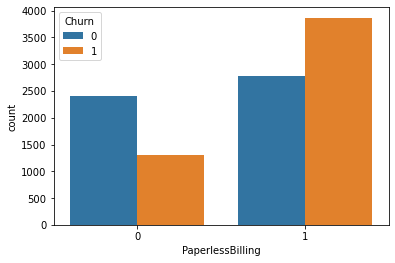

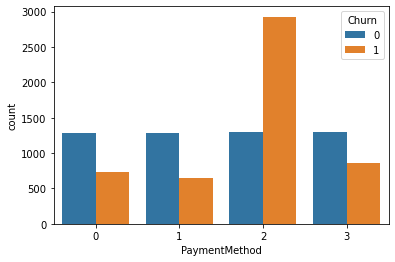

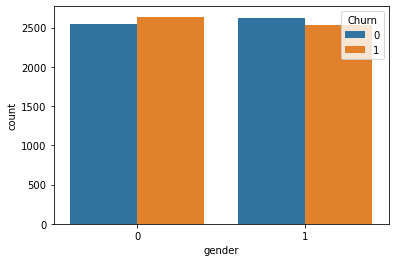

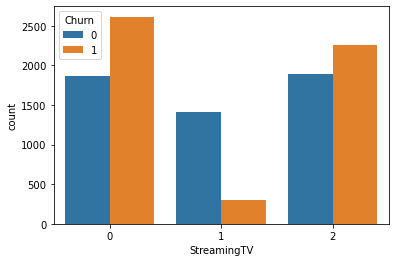

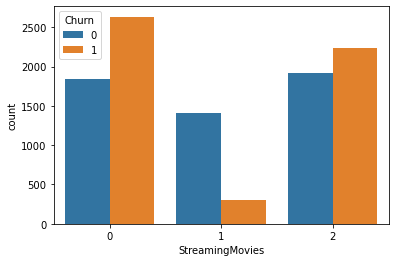

In [53]:
for i,col in enumerate(columns):
    plt.figure(i)
    sn.countplot(x=col, data=df_upsampled, hue = 'Churn')

In [54]:
cor=df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,-0.195525


<AxesSubplot:>

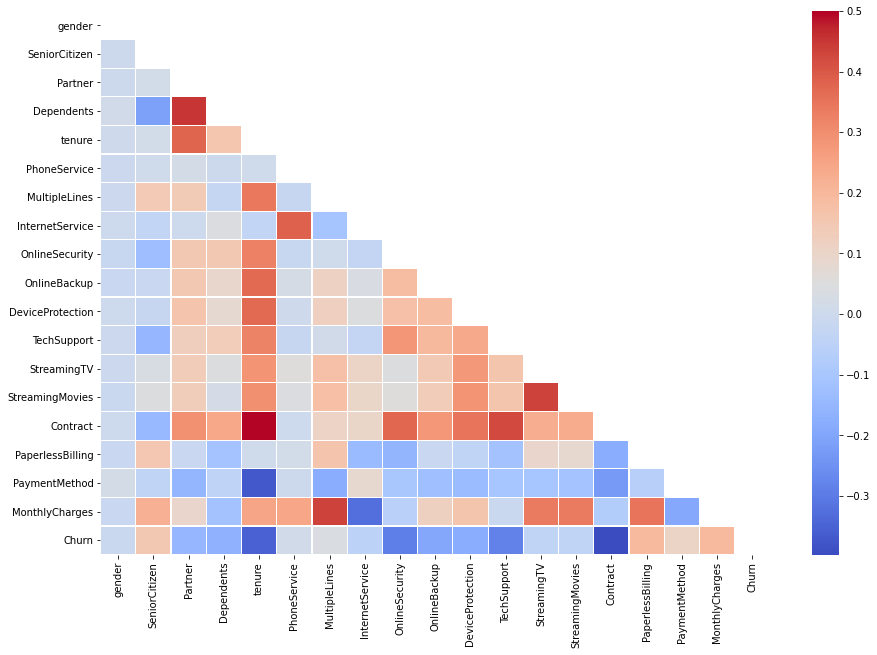

In [55]:
corr = df.corr()
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
plt.figure(figsize=(15, 10))
sn.heatmap(corr,
            vmax=.5,
            mask=hide,
            linewidths=.2, cmap="coolwarm")

Churn is least correlated with MultipleLines and highly correlated with contract and tenure.

<AxesSubplot:>

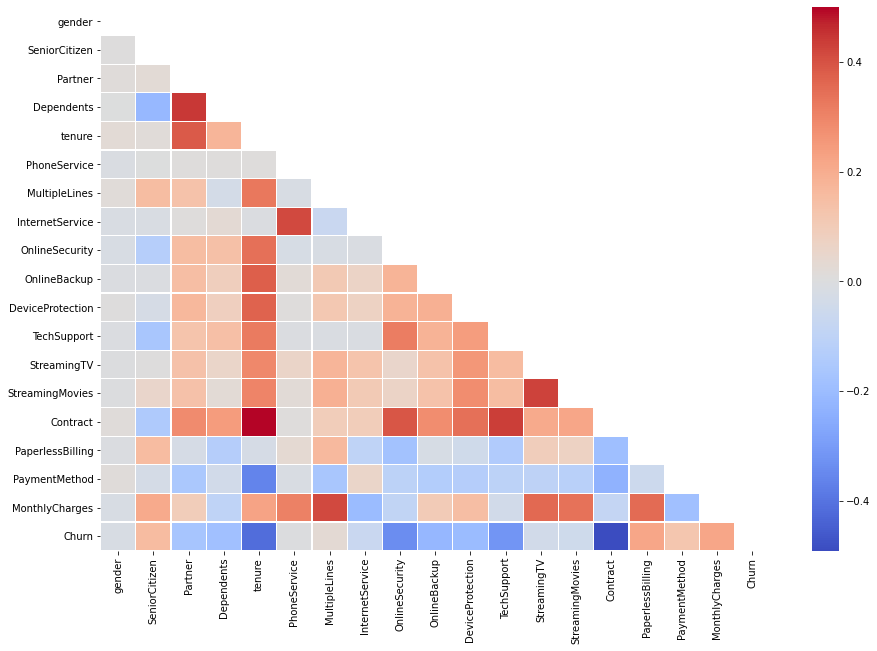

In [56]:
corr = df_upsampled.corr()
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
plt.figure(figsize=(15, 10))
sn.heatmap(corr,
            vmax=.5,
            mask=hide,
            linewidths=.2, cmap="coolwarm")

In [57]:
#converting the type to float
df_upsampled['TotalCharges'] = pd.to_numeric(df_upsampled['TotalCharges'], errors='coerce')

In [58]:
df_upsampled.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [59]:
df_upsampled['TotalCharges'] = df_upsampled['TotalCharges'].fillna(df_upsampled['TotalCharges'].mode()[0])

In [60]:
df_upsampled.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
y = df_upsampled['Churn']
x = df_upsampled.drop(['Churn'],axis = 1)

In [62]:
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x_scaled = pd.DataFrame(scaler.transform(x))
x.columns = features

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.tree import DecisionTreeClassifier

maxaccu =0
maxrs = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = accuracy_score(ytest,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  0.889060688055663 on random state  174


In [65]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.25, random_state=maxrs)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1268
           1       0.84      0.95      0.89      1319

    accuracy                           0.88      2587
   macro avg       0.89      0.88      0.88      2587
weighted avg       0.89      0.88      0.88      2587



In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1035,  233],
       [  72, 1247]], dtype=int64)

In [69]:
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1268
           1       0.76      0.81      0.79      1319

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587



In [70]:
confusion_matrix(y_test,y_pred)

array([[ 938,  330],
       [ 246, 1073]], dtype=int64)

In [71]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1268
           1       0.76      0.88      0.82      1319

    accuracy                           0.80      2587
   macro avg       0.81      0.80      0.80      2587
weighted avg       0.81      0.80      0.80      2587



In [72]:
confusion_matrix(y_test,y_pred)

array([[ 899,  369],
       [ 152, 1167]], dtype=int64)

In [73]:
lr= LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1268
           1       0.75      0.79      0.77      1319

    accuracy                           0.76      2587
   macro avg       0.76      0.76      0.76      2587
weighted avg       0.76      0.76      0.76      2587



In [74]:
confusion_matrix(y_test,y_pred)

array([[ 922,  346],
       [ 274, 1045]], dtype=int64)

In [75]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1268
           1       0.75      0.80      0.77      1319

    accuracy                           0.76      2587
   macro avg       0.76      0.76      0.76      2587
weighted avg       0.76      0.76      0.76      2587



In [76]:
confusion_matrix(y_test,y_pred)

array([[ 923,  345],
       [ 267, 1052]], dtype=int64)

In [77]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1268
           1       0.86      0.95      0.90      1319

    accuracy                           0.90      2587
   macro avg       0.90      0.89      0.89      2587
weighted avg       0.90      0.90      0.89      2587



In [78]:
confusion_matrix(y_test,y_pred)

array([[1067,  201],
       [  70, 1249]], dtype=int64)

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
print(cross_val_score(dtc,x_scaled,y,cv=5).mean())

0.873791068055468


In [81]:
print(cross_val_score(rfc,x_scaled,y,cv=5).mean())

0.8987247217377294


In [82]:
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

0.7671050683776848


In [83]:
print(cross_val_score(abc,x_scaled,y,cv=5).mean())

0.7705841231148562


In [84]:
print(cross_val_score(knc,x_scaled,y,cv=5).mean())

0.7898134177634881


In [85]:
print(cross_val_score(sv,x_scaled,y,cv=5).mean())

0.7854651246955868


In [86]:
from sklearn import metrics

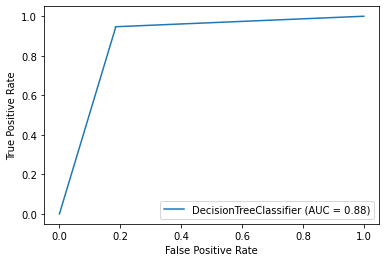

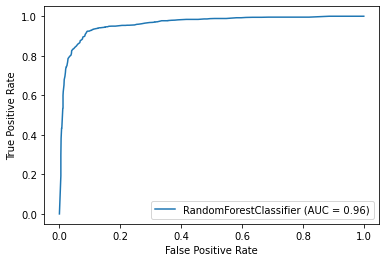

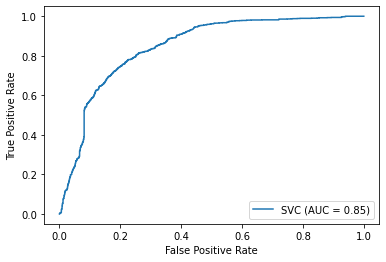

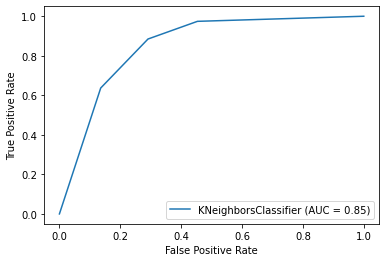

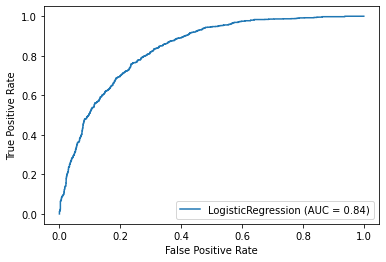

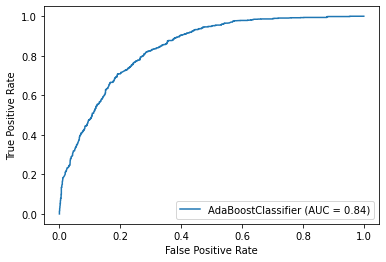

In [87]:
models =[dtc,rfc,sv,knc,lr,abc]
for i in models:
    metrics.plot_roc_curve(i, X_test, y_test)  
    plt.show()

From the above metrics and auc roc curve, we can see that the Random Forest regressor is the best model.

<b>Hyper parameter tuning<b>

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameter = { 
            'max_depth' : np.arange(2,40),
              'criterion':['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2'],
             }

In [90]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [91]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [92]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto'}

In [97]:
Final_mod = RandomForestClassifier(criterion='gini',max_depth=18,max_features='auto')
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

89.25396211828372


In [98]:
confusion_matrix(y_test,pred)

array([[1057,  211],
       [  67, 1252]], dtype=int64)

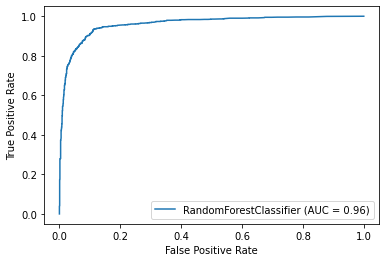

In [99]:
metrics.plot_roc_curve(Final_mod, X_test, y_test)  
plt.show()

<b>Saving Model<b>

In [100]:
import joblib
joblib.dump(Final_mod,"Churn.pkl")

['Churn.pkl']